---
format:
  html:
    code-fold: true
    code-summary: "【クリックでPythonコードを表示】"
jupyter: python3
---

<link rel="stylesheet" type="text/css" href="style.css">
<header>
<dev class="home"><b><u>HOME</u></b></dev>
<a class="order" href="https://coconala.com/users/3496338"><b><u>ご依頼(ココナラ)</u></b></a>
<a href="https://x.gd/EChkP">
<img class="logo" src="pictures\logo-white_40_40x40.png" alt="連絡">
</a>
</header>

<h1>t検体について</h1>
<h2>t検定ってなに?</h2>

<div class="speech-container">
<img class="child-pic" src="pictures\shibainu_2_1.png" alt="子供の顔画像">
<p class="child-txt">博士、t検定って何ですか？</p>
</div>

<div class="speech-container">
<div class="hakase-txt">t検定は、2つのグループ間で平均値が統計的に有意に異なるかどうかを調べるための方法だよ。例えば、あるクラスと別のクラスのテストの平均点を比べて、その差が偶然によるものではないかを確かめるのに使うんだ。</div>
<img class="hakase-pic" src="pictures\shibainu_4_2.png">
</div>

<div class="speech-container">
<img class="child-pic" src="pictures\shibainu_2_1.png" alt="子供の顔画像">
<p class="child-txt">どうやって確かめるんですか？</p>
</div>

<div class="speech-container">
<div class="hakase-txt">まず、各グループの平均値、標準偏差、そして各グループのサンプルサイズを使って計算するんだ。t検定には式があって、この式を使ってt値を計算するよ。</div>
<img class="hakase-pic" src="pictures\shibainu_4_2.png">
</div>


<link rel="stylesheet" type="text/css" href="style.css">
<div class="definition-container">
<strong>t値の式</strong>  
$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s^2}{n_1} + \frac{s^2}{n_2}}}
$$
<ul>
<li>$\bar{X}_1$, $\bar{X}_2$: それぞれのグループの平均値</li>
<li>$s^2$: 両グループの分散のプールされた推定値</li>
<li>$n_1$, $n_2$: それぞれのグループのサンプルサイズ</li>
</ul>
</div>

<div class="speech-container">
<div class="hakase-txt">分散のプールされた推定値とは、2つのグループのサンプルからそのグループ全体の分散を推定した値で、以下の式で書けるよ。</div>
<img class="hakase-pic" src="pictures\shibainu_4_2.png">
</div>

<div class="definition-container">
<strong>分散のプールされた推定値の式</strong>
$$
s^2 = \frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}
$$
<ul>
<li>$n_1$, $n_2$: それぞれのグループのサンプルサイズ</li>
<li>$s_1^2$, $s_2^2$: それぞれのグループの分散</li>
</ul>
</div>

<link rel="stylesheet" type="text/css" href="style.css">
<div class="speech-container">
<img class="child-pic" src="pictures\shibainu_2_1.png" alt="子供の顔画像">
<p class="child-txt">このt値って何を教えてくれるんですか？</p>
</div>

<div class="speech-container">
<div class="hakase-txt">t値が大きければ大きいほど、2つのグループ間の平均値の差が大きいことを意味するよ。そして、このt値を使ってp値を計算し、そのp値がある閾値（よく0.05とされる）より小さい場合、グループ間に統計的に有意な差があると判断されるんだ。</div>
<img class="hakase-pic" src="pictures\shibainu_4_2.png">
</div>

<div class="speech-container">
<img class="child-pic" src="pictures\shibainu_2_1.png" alt="子供の顔画像">
<p class="child-txt">なるほど。でも、これを実際に計算するのは難しそうですね。</p>
</div>

<div class="speech-container">
<div class="hakase-txt">実は、Pythonを使えば、簡単に計算できるんだ。ここで簡単な例をもとにPythonのコードを見てみよう。</div>
<img class="hakase-pic" src="pictures\shibainu_4_2.png">
</div>

<link rel="stylesheet" type="text/css" href="style.css">
<h1>t検定をPythonで実演</h1>
<div class="speech-container">
<div class="hakase-txt">まずは2つのグループの分だけPythonで乱数を作るよ。この2つのグループで平均に有意な差があるかをt検定を使って調べてみよう。</div>
<img class="hakase-pic" src="pictures\shibainu_4_2.png">
</div>

<div class="definition-container">
グループ1:平均100、標準偏差10の正規分布に従う乱数30個  
グループ2:平均105、標準偏差10の正規分布に従う乱数30個</div>

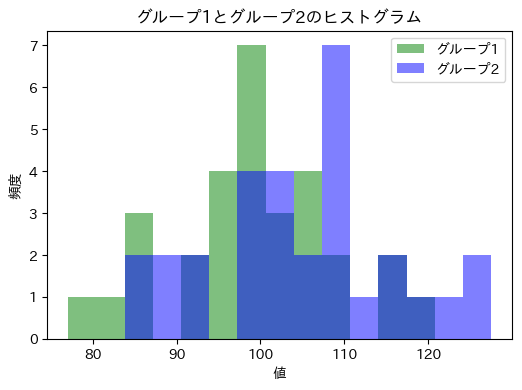

In [1]:
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
np.random.seed(7)

# 2つのグループのデータを仮定
group1 = np.random.normal(100, 10, size=30)  # 平均100、標準偏差10のデータ30個
group2 = np.random.normal(105, 10, size=30)  # 平均105、標準偏差10のデータ30個


# 2つのグループを重ねたヒストグラムを描画（group1を緑色、group2を青色で表示、binsを揃える）
plt.figure(figsize=(6, 4))
bins = np.histogram(np.hstack((group1, group2)), bins=15)[1] # 共通のbinsを設定
plt.hist(group1, bins=bins, alpha=0.5, color='green', label='グループ1')
plt.hist(group2, bins=bins, alpha=0.5, color='blue', label='グループ2')
plt.legend(loc='upper right')
plt.xlabel('値')
plt.ylabel('頻度')
plt.title('グループ1とグループ2のヒストグラム')
plt.show()


<link rel="stylesheet" type="text/css" href="style.css">
<div class="speech-container">
<img class="child-pic" src="pictures\shibainu_2_1.png" alt="子供の顔画像">
<p class="child-txt">分布をヒストグラムで見てみると、グループ2の方が大きい値が出ているから、平均も高そうだね。</p>
</div>

<div class="speech-container">
<div class="hakase-txt">Pythonでt検定をした結果が以下だよ。</div>
<img class="hakase-pic" src="pictures\shibainu_4_2.png">
</div>

In [2]:
# t検定を実行
t_stat, p_value = ttest_ind(group2, group1)

print("[ t検定の結果 ]")
print(f"t統計量: {t_stat:.2f}")
print(f"p値: {p_value:.3f}")

[ t検定の結果 ]
t統計量: 2.04
p値: 0.046


<link rel="stylesheet" type="text/css" href="style.css">
<div class="speech-container">
<img class="child-pic" src="pictures\shibainu_2_1.png" alt="子供の顔画像">
<p class="child-txt">おー、そうすると、このp値を見ればいいんですね！</p>
</div>

<div class="speech-container">
<div class="hakase-txt">その通り！p値が0.05以下なら、「2つのグループ間には統計的に有意な差がある」と結論づけることができるよ。</div>
<img class="hakase-pic" src="pictures\shibainu_4_2.png">
</div>

<div class="speech-container">
<img class="child-pic" src="pictures\shibainu_2_1.png" alt="子供の顔画像">
<p class="child-txt">ということは、今回のp値は0.046だから「統計的に有意」っていうことだね! Pythonだと本当に簡単に求められるんだね!</p>
</div>

<link rel="stylesheet" type="text/css" href="style.css">
<h1>t検定に関する補足</h1>
<div class="speech-container">
<div class="hakase-txt">今回のように2つのグループの平均を比較するときにt検定はとても役に立つんだ。</div>
<img class="hakase-pic" src="pictures\shibainu_4_2.png">
</div>

<div class="speech-container">
<div class="hakase-txt">でも、実は2つのグループの分散が違っていると今回の式ではうまく求められないから気を付けてね。この問題を、ベーレンス・フィッシャー問題っていうよ。</div>
<img class="hakase-pic" src="pictures\shibainu_4_2.png">
</div>

<div class="speech-container">
<img class="child-pic" src="pictures\shibainu_2_1.png" alt="子供の顔画像">
<p class="child-txt">2つのグループが違っていたらどうしたらいいの?t検定で平均が同じかを調べられないの?</p>
</div>

<div class="speech-container">
<div class="hakase-txt">その場合は、ウェルチの信頼区間で近似的に求めらるよ。とても難しい式だから、「2つのグループの分散が違う場合は、t検定の代わりに、ウェルチの信頼区間で近似的に求める!」って覚えておいたらいいよ。</div>
<img class="hakase-pic" src="pictures\shibainu_4_2.png">
</div>

<div class="speech-container">
<img class="child-pic" src="pictures\shibainu_2_1.png" alt="子供の顔画像">
<p class="child-txt">分かったよ博士!今日はt検定について詳しく教えてくれてありがとう!</p>
</div>

<iframe src="writer_page.html" width=100% height=350></iframe>